In [17]:
# conda install -c conda-forge --strict-channel-priority osmnx
# pip install pycairo

import osmnx as ox

/Users/pbhustali/miniforge3/envs/imp-rl-competition-env/lib/python3.9/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


{'n': 40, 'm': 65, 'k_avg': 3.25, 'edge_length_total': 6164.147000000001, 'edge_length_avg': 94.83303076923079, 'streets_per_node_avg': 3.925, 'streets_per_node_counts': {0: 0, 1: 0, 2: 0, 3: 4, 4: 35, 5: 1}, 'streets_per_node_proportions': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.1, 4: 0.875, 5: 0.025}, 'intersection_count': 40, 'street_length_total': 5975.224000000002, 'street_segment_count': 62, 'street_length_avg': 96.37458064516132, 'circuity_avg': 1.0006116472639888, 'self_loop_proportion': 0.0}


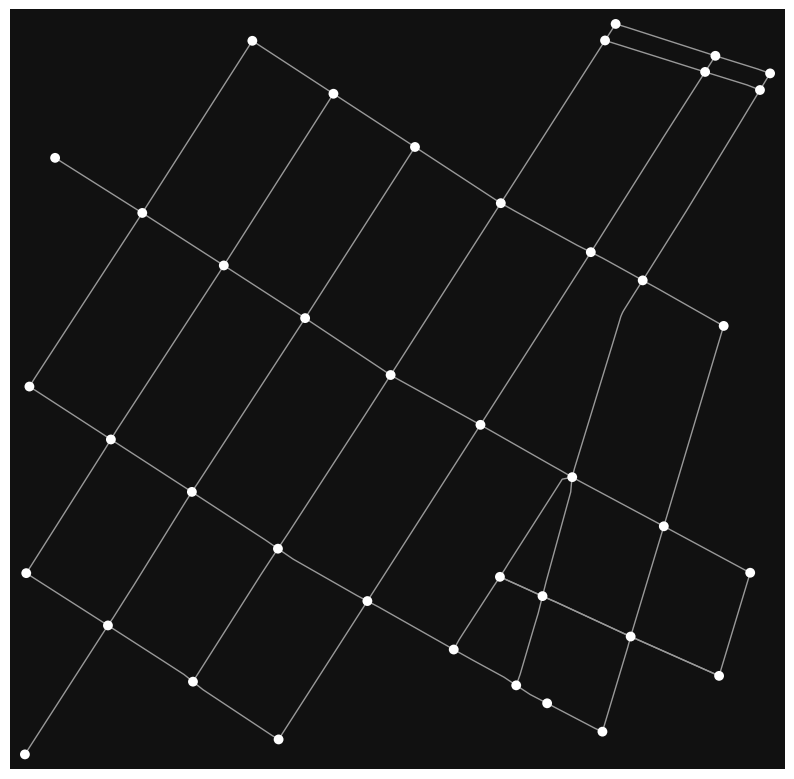

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [18]:
# place_name = "University of Toronto"
place_name = "SoHo, New York, NY"
# place_name = "Amsterdam Zuid"
network_type = "drive"

# custom_filter = ('["highway"~"motorway"]')
custom_filter = None

# networkx graph of the named place
graph = ox.graph_from_address(place_name, 
                              dist=300, # distance in meters
                              network_type=network_type, 
                              simplify=True, 
                              custom_filter=custom_filter)

# graph = graph.to_undirected() # default is MultiGraph

print(ox.basic_stats(graph))

# Plot the graphs
ox.plot_graph(graph,figsize=(10,10), node_size=50)

In [19]:
ox.folium.plot_graph_folium(graph)

/var/folders/w7/40d8p5l1307f8nrkqgv9q47xhwh1n2/T/ipykernel_59632/1038003840.py:1: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.folium.plot_graph_folium(graph)


In [20]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [21]:
nodes, edges = ox.graph_to_gdfs(graph)

nodes.head(5)

,y,x,highway,street_count,geometry
osmid,,,,,
42427327,40.720829,-73.997641,traffic_signals,4,POINT (-73.99764 40.72083)
42428436,40.720855,-74.000654,traffic_signals,4,POINT (-74.00065 40.72085)
42428438,40.721794,-73.999862,NaN,4,POINT (-73.99986 40.72179)
42428441,40.723021,-73.998812,traffic_signals,4,POINT (-73.99881 40.72302)
42428444,40.724235,-73.997785,traffic_signals,4,POINT (-73.99778 40.72424)


In [22]:
# sort edges by name
edges.sort_values(by='name', inplace=True)

edges.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'reversed',
       'length', 'geometry', 'width'],
      dtype='object')

In [23]:
# get all with name 'Broadway'
edges[edges['name']=='Broadway']

,,,osmid,oneway,lanes,name,highway,maxspeed,reversed,length,geometry,width
u,v,key,,,,,,,,,,
42428438,42428436,0,968737544,True,2,Broadway,secondary,25 mph,False,123.972,"LINESTRING (-73.99986 40.72179, -73.99992 40.7...",NaN
1919595915,42428444,0,"[584850105, 1205533071]",True,2,Broadway,secondary,25 mph,False,151.785,"LINESTRING (-73.99681 40.72538, -73.99687 40.7...",NaN
42428441,42428438,0,968737542,True,2,Broadway,secondary,25 mph,False,162.614,"LINESTRING (-73.99881 40.72302, -73.99885 40.7...",NaN
42428444,42428441,0,968737540,True,2,Broadway,secondary,25 mph,False,160.353,"LINESTRING (-73.99778 40.72424, -73.99782 40.7...",NaN
42428447,1919595915,0,947215907,True,NaN,Broadway,secondary,25 mph,False,15.427,"LINESTRING (-73.99671 40.72550, -73.99681 40.7...",NaN


In [24]:
topology = {}

topology['graph'] = {'directed': True,
                    'type': "list",
                    'nodes': [], 
                    'edges': []}

osmids = []
for index, row in nodes.iterrows():
    osmids.append(index)

# nodes
for index, row in nodes.iterrows():
    id = osmids.index(index)
    _x = {'id': id, 'position_x': row['x'], 'position_y': row['y']}
    topology['graph']['nodes'].append(_x)

# edges
k = 0
for index, row in edges.iterrows():

    source = osmids.index(index[0])
    target = osmids.index(index[1])
    
    r = {'id': k, 'source': source, 'target': target, 'distance': row['length']}
    _r = {'id': k+1, 'source': target, 'target': source, 'distance': row['length']}
    topology['graph']['edges'].append(r)
    # topology['graph']['edges'].append(_r)
    k += 1

# segments
topology['segments'] = {"type": "list", 
                        "list": []}

for index, row in edges.iterrows():
    length = row['length']
    capacity = 2*length / 4
    speed = 25 * 1.6 # km/h
    travel_time = length / 1000 / speed

    source = osmids.index(index[0])
    target = osmids.index(index[1])

    r = {'source': source, 'target': target, 'travel_time': travel_time, 'capacity': capacity, 'position_x': None, 'position_y': None}
    _r = {'source': target, 'target': source, 'travel_time': travel_time, 'capacity': capacity, 'position_x': None, 'position_y': None}

    topology['segments']['list'].append(r)
    # topology['segments']['list'].append(_r)


In [25]:
len(topology['segments']['list'])

65

In [26]:
len(topology['graph']['nodes'])

40

In [27]:
# write to YAML
import yaml

_topology = {'topology': topology}  # root key

# load a YAML file
with open("../presets/ToyExample-v2/ToyExample-v2.yaml", 'r') as file:
    toy_example_config = yaml.load(file, Loader=yaml.FullLoader)

# update the topology
toy_example_config['topology'] = topology

with open("../presets/SoHo-v1/SoHo-v1.yaml", 'w') as file:
    yaml.dump(toy_example_config, file, indent=2)

In [28]:
import numpy as np

from imp_act import make

env = make("SoHo-v1")

/Users/pbhustali/Documents/GitHub/imp-act/imp_act/environments/road_env.py:341: RuntimeWarning: Couldn't reach some vertices. at src/paths/dijkstra.c:534
  path = self.graph.get_shortest_paths(
/Users/pbhustali/Documents/GitHub/imp-act/imp_act/environments/road_env.py:357: RuntimeWarning: Couldn't reach some vertices. at src/paths/dijkstra.c:534
  path = self.graph.get_shortest_paths(


Number of nodes: 40
Number of edges: 65


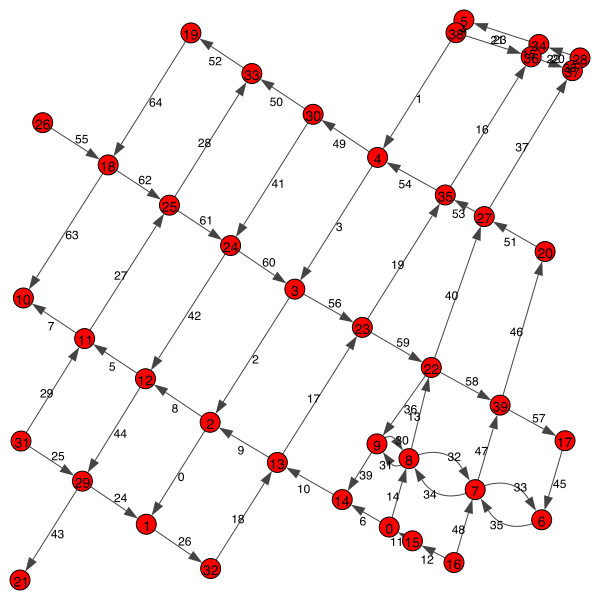

In [29]:
import igraph as ig
import matplotlib.pyplot as plt

# Assuming g is your igraph graph
g = env.graph

# Specify node locations
node_positions = [(v['position_x'], -v['position_y']) for v in g.vs]

num_nodes = len(g.vs)
num_edges = len(g.es)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Plot the graph using igraph
layout = ig.Layout(node_positions)
ig.plot(g, layout=layout, vertex_label=g.vs["id"], edge_label=g.es["id"])

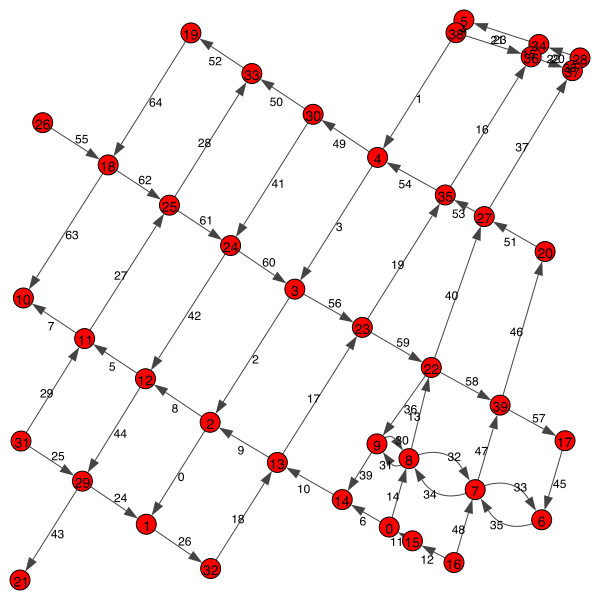

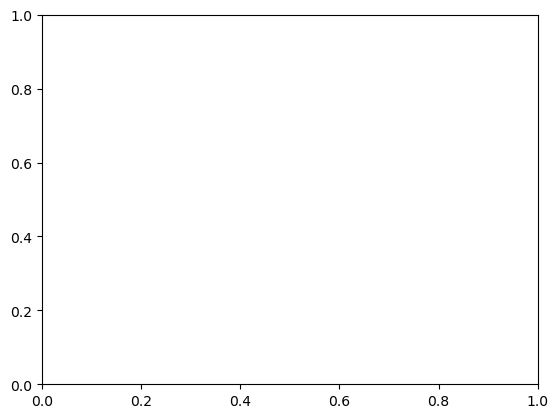

In [30]:
# Extract the coordinates of the vertices
points = [(v['position_x'], -v['position_y']) for v in g.vs]

# Compute the convex hull
hull = ig.convex_hull(points, coords=True)

# Plot the graph
fig, ax = plt.subplots()
layout = ig.Layout(points)
ig.plot(g, layout=layout, vertex_label=g.vs["id"], edge_label=g.es["id"])
# ax.plot(*zip(*hull), 'x')

In [35]:
# list all exterior vertices based on position
exterior_vertices = []
for v in g.vs:
    if (v['position_x'], -v['position_y']) in hull:
        exterior_vertices.append(v['id'])

print(exterior_vertices)

[]
